In [1]:
import numpy as np
import time
import math
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn import neighbors
import random
%matplotlib inline 

In [445]:
cost_data_69 = pd.read_csv('/Users/xidexia/Desktop/299/log/readdata/cost_data_69.csv',index_col=0)
#cost_data_69 = pd.read_csv('/Users/xidexia/Desktop/299/try code/neweros_radec_0921.csv',index_col=0)
cost_data_69.shape

(3059, 69)

(array([  15.,   27.,  198.,  403.,  296.,  782.,  767.,  322.,  236.,   13.]),
 array([ 12.89446219,  13.74722338,  14.59998457,  15.45274576,
         16.30550694,  17.15826813,  18.01102932,  18.86379051,
         19.7165517 ,  20.56931289,  21.42207407]),
 <a list of 10 Patch objects>)

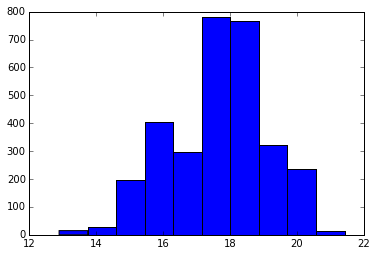

In [3]:
a=np.array(cost_data_69['Mean'])+23
plt.hist(a)

In [4]:
b=1.07568*10**(-7)*10**(a/2.5)

(array([  2.50600000e+03,   2.80000000e+02,   1.91000000e+02,
          6.10000000e+01,   1.30000000e+01,   3.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.54692041e-02,   3.99969678e+00,   7.98392435e+00,
          1.19681519e+01,   1.59523795e+01,   1.99366071e+01,
          2.39208346e+01,   2.79050622e+01,   3.18892898e+01,
          3.58735174e+01,   3.98577449e+01]),
 <a list of 10 Patch objects>)

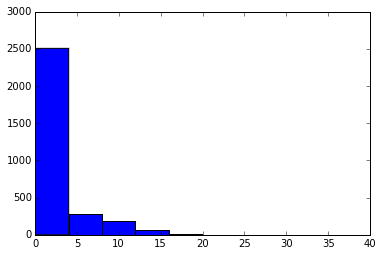

In [5]:
plt.hist(b)

In [6]:
b.mean()

2.6057436495799409

In [7]:
cost_data_69['Mean Cost']=b

In [10]:
#### cost_data_69: 
######    [0:-5]: feature vectors, 
######    [-5]: class, 
######    [-4]: MACHO id, 
######    [-3]: RA, 
######    [-2]: DEC, 
######    [-1]: Mean_cost

### Aperture and FOV

In [11]:
raw_obs = pd.read_csv('/Users/xidexia/Desktop/299/log/readdata/new_obs.csv',index_col=0)
#raw_obs = raw_obs.dropna()
raw_obs = raw_obs.reset_index(drop=True)
raw_obs

,Country,Observatory,Telescope,Instrument,Apperture,FOV
0,Chile,Cerro Tololo,Blanco 4m,ISPI,4.0,10.25
1,Chile,Cerro Tololo,SOAR,SOAR Imager (SOI),4.1,5.20
2,Chile,Cerro Tololo,SOAR,SOAR Adaptive Optics Module (SAM),4.1,3.10
3,Chile,Cerro Tololo,SOAR,SPARTAN Near-IR Camera,4.1,5.00
4,Chile,Cerro Tololo,SOAR,Ohio State IR Imager/Spectrograph (OSIRIS),4.1,2.37
5,Chile,Cerro Tololo,SOAR,NaN,4.1,5.65
6,Chile,Cerro Tololo,SMARTS 1.3m,ANDICAM (Optical Imager),1.3,2.40
7,Chile,Cerro Tololo,SMARTS 1.3m,ANDICAM (IR Imager),1.3,6.00
8,Tuscon,Kitt Peak,WIYN 0.9m,GSAOI,9.0,1.40
9,Hawaii,Mauna Kea,UH 2.2m,Tektronix CCD Cam,2.2,7.50


In [12]:
all_aperture  = [round(i,2) for i in raw_obs['Apperture'].tolist()]
all_fov =  [round(i,2) for i in raw_obs['FOV'].tolist()]

In [13]:
unique_aperture = [1,2,3,5,7,10]
unique_fov = [0.01,0.05,0.1,0.3,0.6,1.1]

In [14]:
unique_aperture

[1, 2, 3, 5, 7, 10]

In [15]:
aperture = unique_aperture
fov = unique_fov

In [16]:
fov
aperture

[1, 2, 3, 5, 7, 10]

In [17]:
#obs_list = np.dstack([aperture,fov])[0]
obs_list = []
for i in aperture:
    for j in fov:
        obs_list.append([i,j])

In [18]:
len(obs_list)

36

In [19]:
obs_list

[[1, 0.01],
 [1, 0.05],
 [1, 0.1],
 [1, 0.3],
 [1, 0.6],
 [1, 1.1],
 [2, 0.01],
 [2, 0.05],
 [2, 0.1],
 [2, 0.3],
 [2, 0.6],
 [2, 1.1],
 [3, 0.01],
 [3, 0.05],
 [3, 0.1],
 [3, 0.3],
 [3, 0.6],
 [3, 1.1],
 [5, 0.01],
 [5, 0.05],
 [5, 0.1],
 [5, 0.3],
 [5, 0.6],
 [5, 1.1],
 [7, 0.01],
 [7, 0.05],
 [7, 0.1],
 [7, 0.3],
 [7, 0.6],
 [7, 1.1],
 [10, 0.01],
 [10, 0.05],
 [10, 0.1],
 [10, 0.3],
 [10, 0.6],
 [10, 1.1]]

### Data Split

In [20]:
Xr, Xt, yr, yt = train_test_split(np.array(cost_data_69), cost_data_69['Class'], train_size=2020, test_size=1039, random_state=42)
Xinit, Xsearch, yinit, ysearch = train_test_split(Xr, yr, train_size=20, test_size=2000, random_state=42)

Xinit_copy = Xinit
Xsearch_copy = Xsearch
Xr_copy = Xr
Xt_copy = Xt

yinit_copy = yinit
ysearch_copy = ysearch
yr_copy = yr
yt_copy = yt


In [21]:
init_list = [1,200,250,1300,1600,1800,2500,2052,2057,500,550,600]
Xinit = np.array(cost_data_69)[init_list]
Xsearch = np.delete(np.array(cost_data_69),init_list,0)
yinit = np.array(cost_data_69['Class'].tolist())[init_list]
print yinit
ysearch = np.delete(np.array(cost_data_69['Class'].tolist()),init_list,0)
#np.array(cost_data_69['Class'].tolist())

[ 1.  2.  3.  4.  5.  5.  6.  7.  7.  8.  8.  8.]


### Tools

In [22]:
def kmeans_labels(data,k=10):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit(data)
    return kmeans.labels_.tolist()

def plot_with_errbars(N, data):
    x = np.arange(N)
    mean = np.nanmean(data, axis=0)
    std = np.nanstd(data, axis=0)
    valid = ~np.isnan(mean)
    plt.fill_between(x[valid], (mean-2*std)[valid], (mean+2*std)[valid], color='#d0d0d0')
    plt.plot(x[valid], mean[valid])
    
# return the pair with longest distrance in a batch of samples
def angular_distance_N_whole_length(X):
    temp = np.zeros((X.shape[0],X.shape[0]))
    for i in xrange(X.shape[0]):
        for j in xrange(X.shape[0]):
            temp[i][j] = angular_distance_2_whole_length(X[i], X[j])
    indices = np.where( temp == temp.max() )
    return temp.max(),indices[0][0] ,indices[1][0] 

def angular_distance_2_whole_length(X1, X2):
    r1 = X1[-3]
    d1 = X1[-2]
    r2 = X2[-3]
    d2 = X2[-2]
    return math.sqrt(math.pow((r1-r2)*math.cos((d1+d2)/2),2)+(d1-d2)*(d1-d2))

def euclidean_distance_2_whole_length(X1, X2):
    r1 = X1[-3]
    d1 = X1[-2]
    r2 = X2[-3]
    d2 = X2[-2]
    return math.sqrt((r1-r2)*(r1-r2)+(d1-d2)*(d1-d2))

def angular_distance_2_ra_dec(X1, X2):
    r1 = X1[0]
    d1 = X1[1]
    r2 = X2[0]
    d2 = X2[1]
    return math.sqrt(math.pow((r1-r2)*math.cos((d1+d2)/2),2)+(d1-d2)*(d1-d2))
    
def euclidean_distance_2_ra_dec(X1,X2):
    r1 = X1[0]
    d1 = X1[1]
    r2 = X2[0]
    d2 = X2[1]
    return math.sqrt((r1-r2)*(r1-r2)+(d1-d2)*(d1-d2))

def get_uncertainty_by_ranfom_forest(Xinit,yinit,Xsearch,Xt,yt, uncertainty_thred, uncertainty_size=1000):
    clf_v2_random_forest = RandomForestClassifier(n_estimators=100)
    clf_v2_random_forest.fit(Xinit[:,:-5], yinit)

    max_test_rf_est_list = clf_v2_random_forest.predict_proba(Xsearch[:,:-5]).max(axis=1)
    uncertainty_idx_list = np.flatnonzero(max_test_rf_est_list)
    return np.unique(uncertainty_idx_list), 1-max_test_rf_est_list[uncertainty_idx_list], clf_v2_random_forest.score(Xt[:,:-5], yt)

def pointing_by_window_whole_length(Xc,radius,size):
    a = []
    d_min = Xc[:,-2].min()
    d_max = Xc[:,-2].max()
    r_min = Xc[:,-3].min()
    r_max = Xc[:,-3].max()
    d_step = (d_max-d_min)/(size-1.)
    r_step = (r_max-r_min)/(size-1.)
    for i in xrange(size):
        for j in xrange(size):
            c_temp_r = r_min + (i+0.5)*r_step
            c_temp_d = d_min + (j+0.5)*d_step
            temp = []
            for k in xrange(Xc.shape[0]):
                r_temp = Xc[k,-3]
                d_temp = Xc[k,-2]
                if angular_distance_2_ra_dec([c_temp_r,c_temp_d],[r_temp,d_temp])<radius: temp.append(k)          
            a.append(temp)  
    return a

def pointing_by_object_whole_length(Xc,radius):            
    a = []
    if Xc.shape[0]==0: return a
    kdtree = neighbors.KDTree(Xc[:,-3:-1], leaf_size=2)  
    for i in xrange(Xc.shape[0]):
        b = kdtree.query_radius(Xc[i,-3:-1], r=2*radius)[0]
        temp=[]
        for j in xrange(b.shape[0]):
            if angular_distance_2_whole_length(Xc[i], Xc[b[j]])<radius: temp.append(b[j])
        a.append(temp)
    return a

def single_pointing_score_All(temp_pointing, diversity_label_list, uncertainty_score_list, Xc):    
    magnitude_score_temp = Xc[temp_pointing,-1].max()
    diversity_score_temp = np.unique(np.array(diversity_label_list)[temp_pointing]).shape[0]
    label_covered = np.unique(np.array(diversity_label_list)[temp_pointing])
    uncertainty_score_temp = uncertainty_score_list[temp_pointing].sum()
    return uncertainty_score_temp, diversity_score_temp, magnitude_score_temp, label_covered.tolist()

def single_pointing_score_thred(temp_pointing, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85):
    mag_thred_value = np.sort(Xc[temp_pointing,-1])[int(len(temp_pointing)*mag_thred)-1]
    qualified_list = np.array(temp_pointing)[Xc[temp_pointing,-1] <= mag_thred_value]
    diversity_score_temp = np.unique(np.array(diversity_label_list)[qualified_list]).shape[0]
    label_covered = np.unique(np.array(diversity_label_list)[qualified_list])
    uncertainty_score_temp = uncertainty_score_list[qualified_list].sum()
    return uncertainty_score_temp, diversity_score_temp, mag_thred_value, label_covered.tolist()

def multiple_pointing_score_All(temp_pointing_list, num_pointing, diversity_label_list, uncertainty_score_list,Xc):    
    magnitude_score_temp = 0
    uncertainty_score_temp = 0
    all_list = np.array([])
    for i in xrange(num_pointing):
        temp_pointing = temp_pointing_list[i]
        all_list = np.append(all_list,temp_pointing)
        magnitude_score_temp = magnitude_score_temp + Xc[temp_pointing,-1].max()
        uncertainty_score_temp = uncertainty_score_temp + uncertainty_score_list[temp_pointing].sum()
    all_list = np.unique(all_list.flatten()).astype(int)
    diversity_score_temp = np.unique(np.array(diversity_label_list)[all_list]).shape[0]
    label_covered = np.unique(np.array(diversity_label_list)[all_list])
    return uncertainty_score_temp, diversity_score_temp, magnitude_score_temp, label_covered.tolist()

def multiple_pointing_score_thred(temp_pointing_list, num_pointing, diversity_label_list, uncertainty_score_list,Xc,mag_thred=0.85):
    magnitude_score_temp = 0
    uncertainty_score_temp = 0
    all_list = np.array([])
    for i in xrange(num_pointing):
        temp_pointing = temp_pointing_list[i]
        mag_thred_value = np.sort(Xc[temp_pointing,-1])[int(len(temp_pointing)*mag_thred)-1]       
        magnitude_score_temp = magnitude_score_temp + mag_thred_value
        qualified_list = np.array(temp_pointing)[Xc[temp_pointing,-1] <= mag_thred_value]
        uncertainty_score_temp = uncertainty_score_temp + uncertainty_score_list[qualified_list].sum()
        all_list = np.append(all_list,qualified_list)
        all_list = np.unique(all_list.flatten()).astype(int)
    diversity_score_temp = np.unique(np.array(diversity_label_list)[all_list]).shape[0]
    label_covered = np.unique(np.array(diversity_label_list)[all_list])
    return uncertainty_score_temp, diversity_score_temp, magnitude_score_temp, label_covered.tolist()

def next_pointing_score_All(previous_pointing_list_merged, previous_score_list, nex_temp_pointing, diversity_label_list, uncertainty_score_list, Xc):
    previous_uncertainty = previous_score_list[0]
    previous_diversity = previous_score_list[1]
    previous_magnitude = previous_score_list[2]
    magnitude_score_temp = Xc[nex_temp_pointing,-1].max() + previous_magnitude
    all_list = previous_pointing_list_merged.append(nex_temp_pointing)
    diversity_score_temp = np.unique(np.array(diversity_label_list)[all_list]).shape[0]
    label_covered = np.unique(np.array(diversity_label_list)[all_list])
    uncertainty_score_temp = uncertainty_score_list[temp_pointing].sum() + previous_uncertainty
    return uncertainty_score_temp, diversity_score_temp, magnitude_score_temp, label_covered.tolist()

def score_list_1st_pointing(pointing_table, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85):
    num_pointing = len(pointing_table)
    score_list = np.zeros((num_pointing,3))
    label_covered_list = []
    for i in xrange(num_pointing):
        temp_pointing = pointing_table[i]
        Su_temp, Sd_temp, Sm_temp, label_covered = single_pointing_score_thred(temp_pointing, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85)
        score_list[i][0] = Su_temp
        score_list[i][1] = Sd_temp
        score_list[i][2] = Sm_temp
        label_covered_list.append(label_covered)
    return score_list, label_covered_list

def score_list_next_pointing(previous_score_list, previous_label_covered, next_pointing_table, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85):
    Su_prev = previous_score_list[0]
    Sd_prev = previous_score_list[1]
    Sm_prev = previous_score_list[2]
    
    num_pointing = len(next_pointing_table)
    score_list = np.zeros((num_pointing,3))
    label_covered_list = []
    
    for i in xrange(num_pointing):   
        next_temp_pointing = next_pointing_table[i]
        mag_thred_value = np.sort(Xc[next_temp_pointing,-1])[int(len(next_temp_pointing)*mag_thred)-1]        
        qualified_list_temp = np.array(next_temp_pointing)[Xc[next_temp_pointing,-1] <= mag_thred_value]
        score_list[i,0] = uncertainty_score_list[qualified_list_temp].sum() + Su_prev
        label_covered = np.unique(np.array(diversity_label_list)[qualified_list_temp])
        
        score_list[i,1] = np.unique(np.append(label_covered, previous_label_covered).flatten()).shape[0]
        score_list[i,2] = Sm_prev + mag_thred_value
        label_covered_list.append(np.unique(np.append(label_covered, previous_label_covered).flatten()).tolist())
    return score_list, label_covered_list

def score_normalization(score_list):
    score_list_normalized = score_list.copy()
    score_list_normalized[:,0] = score_list[:,0]/score_list[:,0].max()    
    score_list_normalized[:,1] = score_list[:,1]/score_list[:,1].max()    
    score_list_normalized[:,2] = score_list[:,2]/score_list[:,2].max()   
    total_score_normalized = score_list_normalized.sum(axis=1)
    return score_list_normalized, total_score_normalized, [score_list[:,0].max(),score_list[:,1].max(),score_list[:,2].max()]
    
def select_N_pointing_w_prob(total_score_normalized, N):
    p = total_score_normalized/total_score_normalized.sum()
    return np.random.choice(total_score_normalized.shape[0], N, p=p)

def select_N_pointing_w_max(total_score_normalized, N):
    return total_score_normalized.argsort()[-N:]

def unique0(a):
    num = a.shape[0]
    a_u = []
    a_u.append(a[0])
    u = [0]
    for i in xrange(1,num):
        flag = 0
        for j in xrange(len(a_u)):
            if np.array(a[i]).all()==np.array(a_u[j]).all(): 
                flag=1
                break
        if flag==0: 
            a_u.append(a[i])
            u.append(i)
    return np.array(a_u),u

In [118]:
def pointing_by_object_whole_length_w_randomness(Xc,radius):            
    a = []
    if Xc.shape[0]==0: return a
    kdtree = neighbors.KDTree(Xc[:,-3:-1], leaf_size=2)  
    for i in xrange(Xc.shape[0]):       
        theta = random.random()*math.pi*2
        det_ra = math.cos(theta)*0.1*radius
        det_dec = math.sin(theta)*0.1*radius
        
        b = kdtree.query_radius([Xc[i,-3]+det_ra, Xc[i,-2]+det_dec], r=2*radius)[0]
        temp=[]
        for j in xrange(b.shape[0]):
            if angular_distance_2_ra_dec([Xc[i,-3]+det_ra, Xc[i,-2]+det_dec], Xc[b[j],-3:-1])<radius: temp.append(b[j])
        if temp==[]: 
            print angular_distance_2_ra_dec([Xc[i,-3]+det_ra, Xc[i,-2]+det_dec], Xc[i,-3:-1])
        #a.append(temp)
    return a

def pointing_by_object_whole_length_w_randomness(Xc,radius):            
    a = []
    if Xc.shape[0]==0: return a
    kdtree = neighbors.KDTree(Xc[:,-3:-1], leaf_size=2)  
    for i in xrange(Xc.shape[0]):
        theta = random.random()*math.pi*2
        det_ra = math.cos(theta)*0.1*radius
        det_dec = math.sin(theta)*0.1*radius
        
        b = kdtree.query_radius([Xc[i,-3]+det_ra, Xc[i,-2]+det_dec], r=2*radius)[0]
        temp=[]
        for j in xrange(b.shape[0]):
            if angular_distance_2_ra_dec([Xc[i,-3]+det_ra, Xc[i,-2]+det_dec], Xc[b[j],-3:-1])<radius: temp.append(b[j])
        a.append(temp)
    return a

init_temp, thermostat,reannealing,itol =10.0, 0.95, 10,5000

def simulating_annealing(Xc, idx_prev,score_prev,pointing_table,init_temp, thermostat,reannealing,itol):
    m=10000     
    temperature = init_temp   

    it = 0                    
    # number of iterations
    atp=0

    while it >=0:
        idx_cand = random.randint(0,len(pointing_table)-1)
        b = random.randint(0,1)
        idx_remain = idx_prev[b]
        x = score_2_pointing(Xc, pointing_table,idx_remain,idx_cand, dom,mag_thred=0.85)
        score_new = x[0].sum()   
        time_new = x[1]

        if score_prev < score_new:
            idx_prev = [idx_remain , idx_cand]
            score_prev = score_new 
            it = it+1

        elif np.random.rand() < np.exp( -abs(score_prev-score_new)/temperature):
            idx_prev = [idx_remain , idx_cand]
            score_prev = score_new 
            it = it+1
        atp =atp +1;  # NUMBER OF ITERATIONS

        # check if it is time to cool down
        if it % reannealing == 0:
            temperature = thermostat * temperature;
            #temperature =  temperature/log(it);
            compl_temp=0;
            #if we get too cold, reheat
            if temperature < 0.01:
                temperature = 1
        if atp >itol: break
    return idx_prev,score_prev, time_new

def score_list_next_pointing(pointing_table, selected_idx, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85):
    previous_obj = pointing_table[selected_idx]
    
    num_pointing = len(next_pointing_table)
    score_list = np.zeros((num_pointing,3))
    label_covered_list = []
    
    for i in xrange(num_pointing):   
        next_temp_pointing = next_pointing_table[i]
        mag_thred_value = np.sort(Xc[next_temp_pointing,-1])[int(len(next_temp_pointing)*mag_thred)-1]        
        qualified_list_temp = np.array(next_temp_pointing)[Xc[next_temp_pointing,-1] <= mag_thred_value]
        score_list[i,0] = uncertainty_score_list[qualified_list_temp].sum() + Su_prev
        label_covered = np.unique(np.array(diversity_label_list)[qualified_list_temp])
        
        score_list[i,1] = np.unique(np.append(label_covered, previous_label_covered).flatten()).shape[0]
        score_list[i,2] = Sm_prev + mag_thred_value
        label_covered_list.append(np.unique(np.append(label_covered, previous_label_covered).flatten()).tolist())
    return score_list, label_covered_list

def combined_pointing_score_list(Xc, pointing_table, first_pointing_idx, mag_thred=0.85):
    previous_obj = pointing_table[first_pointing_idx]
    previous_time = np.sort(Xc[previous_obj,-1])[int(len(previous_obj)*mag_thred)-1]
    b = []
    for i in xrange(len(pointing_table)):  
        if i == first_pointing_idx: i +=1
        if i>=len(pointing_table): break
        cand_temp = pointing_table[i]
        time_temp = np.sort(Xc[cand_temp,-1])[int(len(cand_temp)*mag_thred)-1] + previous_time
        combined_temp = np.unique(cand_temp + previous_obj).tolist()
        a = single_pointing_score_thred(combined_temp, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85)
        b.append([a[0],a[1],time_temp])
    return np.array(b)

def score_2_pointing(Xc, pointing_table, idx1,idx2, dom, mag_thred=0.85):
    p1 = pointing_table[idx1]
    time1 = np.sort(Xc[p1,-1])[int(len(p1)*mag_thred)-1]
    
    p2 = pointing_table[idx2]
    time2 = np.sort(Xc[p2,-1])[int(len(p2)*mag_thred)-1]
    b = []
    combined_temp = np.unique(p1 + p2).tolist()
    a = single_pointing_score_thred(combined_temp, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85)
    b.append([a[0]/dom[0],a[1]/dom[1],(time1+time2)/dom[2]])
    return [np.array(b), time1+time2]

def pointing_score_list(pointing_table, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85):
    num_pointing = len(pointing_table)
    score_list = np.zeros((num_pointing,3))
    for i in xrange(num_pointing):
        temp_pointing = pointing_table[i]
        Su_temp, Sd_temp, Sm_temp, label_covered = single_pointing_score_thred(temp_pointing, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85)
        score_list[i][0] = Su_temp
        score_list[i][1] = Sd_temp
        score_list[i][2] = Sm_temp
    return score_list



In [142]:
def single_pointing_score_thred(temp_pointing, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85):
    mag_thred_value = np.sort(Xc[temp_pointing,-1])[int(len(temp_pointing)*mag_thred)-1]
    qualified_list = np.array(temp_pointing)[Xc[temp_pointing,-1] <= mag_thred_value]
    diversity_score_temp = np.unique(np.array(diversity_label_list)[qualified_list]).shape[0]
    label_covered = np.unique(np.array(diversity_label_list)[qualified_list])
    uncertainty_score_temp = uncertainty_score_list[qualified_list].sum()
    return uncertainty_score_temp, diversity_score_temp, mag_thred_value, label_covered.tolist()

In [203]:
def remove_from_list(pointing_score_list_prev,ele):
    del_list = []
    for i in xrange(len(pointing_score_list_prev)):
        if pointing_score_list_prev[i][0] == ele:
            del_list.append(i)
    pointing_score_list_curr = np.delete(np.array(pointing_score_list_prev),del_list,0).tolist()
    return pointing_score_list_curr

def submodular_function(Xc,diversity_label_list,uncertainty_score_list, S_prev,cost_prev,pointing_score_list_prev,Budget):
    score_prev = len(S_prev)
    score_list = []
    for i in xrange(len(pointing_score_list_prev)):
        di = pointing_score_list_prev[i][0]
        ci = pointing_score_list_prev[i][1][-1]
        
        S_temp = set(S_prev) | set(di)
        Su_temp, Sd_temp, Sm_temp, label_covered = single_pointing_score_thred(list(S_temp), diversity_label_list, uncertainty_score_list, Xc)
        score_temp = [Su_temp/ci, Sd_temp/ci, Sm_temp/ci]
        score_list.append(score_temp)
        
    score_list_normalized, total_score_normalized,dom = score_normalization(np.array(score_list))
    idx = total_score_normalized.argmax()

    if pointing_score_list_prev[idx][1][-1] + cost_prev <= Budget:
        S_new = set(S_prev) | set(pointing_score_list_prev[idx][0])
        cost_new = pointing_score_list_prev[idx][1][-1] + cost_prev
    else:
        S_new = S_prev
        cost_new = cost_prev
    pointing_score_list_curr = remove_from_list(pointing_score_list_prev,pointing_score_list_prev[idx][0])
    
    return list(S_new),cost_new,idx, pointing_score_list_curr

In [ ]:
while cost_curr < Budget and len(I_curr)>0: 
    S_curr,cost_curr,idx, I_curr,C_curr = combine_function(S_curr,cost_curr,I_curr,C_curr,Budget)
S_curr,cost_curr,idx, I_curr,C_curr

In [198]:
uncertainty_score_list.shape

(2000,)

### Test

In [290]:
initial_size = 20
Budget =50
num_loops =5
N=20
num_deg = len(obs_list)
uncertainty_thred=1

acc_list_rf_best = np.zeros((num_deg,num_loops,N+10))
time_cost_list_rf_best = np.zeros((num_deg,num_loops,N+10))

In [291]:
import time
begin = time.time()

for dk in xrange(len(obs_list)):
    degree = obs_list[dk][1]
    print "degree= ", degree
    for j in xrange(num_loops):
        print "j= ",j
        Xsearch = Xsearch_copy
        ysearch = ysearch_copy 
        
        Xinit = Xinit_copy
        yinit = yinit_copy 
        
        Xt = Xt_copy
        yt = yt_copy 
        
        Xlabel = Xinit
        ylabel = yinit
        
        uncertainty_idx_list,uncertainty_score_list,acc_temp = get_uncertainty_by_ranfom_forest(Xinit,yinit,Xsearch,Xt,yt, uncertainty_thred=1)
        
        acc_list_rf_best[dk,j,0] = acc_temp
        time_cost_list_rf_best[dk,j,0] = 0

        # remain list (high certainty)
        Xre = np.delete(Xsearch,uncertainty_idx_list,0)
        yre = np.delete(np.array(ysearch),uncertainty_idx_list,0)
        
        pca_data = PCA(n_components=10).fit_transform(Xsearch[:,:-5]) 
        diversity_label_list = kmeans_labels(pca_data)

        pointing_table = pointing_by_object_whole_length_w_randomness(Xsearch,degree)
        # score_list: (su, sd, sm) of pointing_table
        score_list = pointing_score_list(pointing_table, diversity_label_list, uncertainty_score_list, Xsearch, mag_thred=0.85)

        p_s_set_list = []
        for ai in xrange(len(pointing_table)):
            p_s_set_list.append([pointing_table[ai],score_list[ai].tolist()])
            
        score_list_normalized, total_score_normalized,dom = score_normalization(score_list)
        # first_pointing_idx: the highest one
        first_pointing_idx = select_N_pointing_w_max(total_score_normalized, 1)

        S_curr = pointing_table[first_pointing_idx]
        cost_curr = score_list[first_pointing_idx][0,-1]
        p_s_set_list_curr = remove_from_list(p_s_set_list,pointing_table[first_pointing_idx])


        for i in xrange(N-1):
            if i%20==0: print "i=", i
            if cost_curr/(obs_list[dk][0]*obs_list[dk][0]) >= Budget and len(p_s_set_list_curr)==0: break
                                 
            S_curr,cost_curr,idx, p_s_set_list_curr = submodular_function(Xsearch,diversity_label_list,uncertainty_score_list, S_curr,cost_curr,p_s_set_list_curr,Budget)        

            selected_obj_list = S_curr
            X_selected = Xsearch[selected_obj_list]
            y_selected = ysearch[selected_obj_list]

            Xlabel = np.vstack((Xlabel,X_selected))   
            ylabel = np.append(ylabel,y_selected)

            uncertainty_idx_list,uncertainty_score_list,acc_temp = get_uncertainty_by_ranfom_forest(Xlabel,ylabel,Xsearch,Xt,yt, uncertainty_thred=1)
            acc_list_rf_best[dk,j,i+1] = acc_temp
            time_cost_list_rf_best[dk,j,i+1] = cost_curr/(obs_list[dk][0]*obs_list[dk][0])
            
print 'Time Elapsed:', time.time()-begin 

degree=  0.01
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.05
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.1
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.3
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.6
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  1.1
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.01
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.05
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.1
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.3
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.6
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  1.1
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.01
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.05
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.1
j=  0
i= 0
j=  1
i= 0
j=  2
i

In [304]:
for j in xrange(len(obs_list)):
    for k in xrange(num_loops):
        for i in xrange(1,30):
            if(time_cost_list_rf_best[j,k,i] == 0):
                time_cost_list_rf_best[j,k,i] = 50

In [305]:
obs_list

[[1, 0.01],
 [1, 0.05],
 [1, 0.1],
 [1, 0.3],
 [1, 0.6],
 [1, 1.1],
 [2, 0.01],
 [2, 0.05],
 [2, 0.1],
 [2, 0.3],
 [2, 0.6],
 [2, 1.1],
 [3, 0.01],
 [3, 0.05],
 [3, 0.1],
 [3, 0.3],
 [3, 0.6],
 [3, 1.1],
 [5, 0.01],
 [5, 0.05],
 [5, 0.1],
 [5, 0.3],
 [5, 0.6],
 [5, 1.1],
 [7, 0.01],
 [7, 0.05],
 [7, 0.1],
 [7, 0.3],
 [7, 0.6],
 [7, 1.1],
 [10, 0.01],
 [10, 0.05],
 [10, 0.1],
 [10, 0.3],
 [10, 0.6],
 [10, 1.1]]

In [306]:
for j in xrange(len(obs_list)):
    for k in xrange(num_loops):
        for i in xrange(N+10):
            if(acc_list_rf_best[j,k,i]!= 0):
                temp = acc_list_rf_best[j,k,i]
                
        for i in xrange(1,N+10):
            if(acc_list_rf_best[j,k,i] == 0):
                acc_list_rf_best[j,k,i] = temp

In [321]:
acc_list_rf_best_backup= acc_list_rf_best
time_cost_list_rf_best_backup = time_cost_list_rf_best

In [325]:
acc_list_rf_best = acc_list_rf_best+0.2

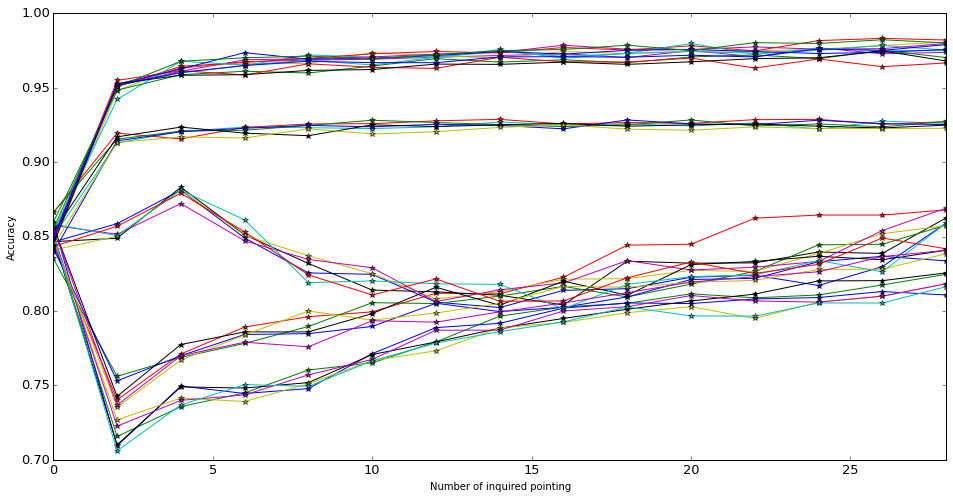

In [326]:
xx = np.arange(30)*2
plt.figure(figsize=(16,8))

for i in xrange(num_deg):
    plt.plot(xx,acc_list_rf_best[i].mean(axis=0),ls='-',marker="*")

plt.xlabel('Number of inquired pointing')
plt.ylabel('Accuracy')
plt.xlim((0,28))
plt.legend(loc=4)